**<H3> Analysis of Attributes Relating to User Knowledge Levels Pertaining to DC Machines in a Given Dataset </H3>**
**Group 002-08:** Christopher Davis, Eashan Halbe, Moira Renata, Riley Lowe

<h4>Introduction:</h4>

**<li> Background Information </li>**

Knowledge modeling is the process of creating a model of knowledge and/or specifications for a particular process, structure, or entity that is interpretable by a computer. In this case, the dataset models knowledge of students in the field of electrical DC machines that convert direct current electrical energy into mechanical energy through various measures such as study time and study repetition through modeling methods. DC machines are used in applications where a wide range of speeds and precise good regulation is a requirement alongside widespread use of AC machines which use alternating current. <br>

**<li> Statement of the Question We Wish to Answer </li>**
Which learning metrics out of the ones given, best predict user knowledge level (UNS) in the given context of electrical DC machines and how are those attributes correlated amongst themselves? This analysis may thus help in the formulation of targeted learning initiatives in the given field by outlining specific factors of significance.  

**<li> Description of the Dataset </li>**
The User Knowledge Modeling Data Set is found in the UCI Machine Learning Repository and was created by Hamdi Tolga Kahraman, Ilhami Colak, and Seref Sagiroglu in 2009. This data set has 258 rows and contains data of the students' knowledge in the field of electrical DC Machines. It has 6 columns, 5 input attributes (quantitative) and 1 target attribute (qualitative). The authors classified the UNS based on the K-nearest neighbour algorithm, also known as K-NN. Descriptions of attributes are listed in the table below: 

<table style="width:100%">
  <tr>
    <th>Attribute</th>
    <th>Description</th>
    <th>Example</th>
  </tr>
  <tr>
    <td>STG</td>
    <td>The degree of study time for goal object materials.</td>
    <td>0, 0.18, 0.276</td>
  </tr>
  <tr>
    <td>SCG</td>
    <td>The degree of repetition number of user for goal object materials. </td>
    <td>0.3, 0.52, 0.259</td>
  </tr>
   <tr>
    <td>STR</td>
    <td>The degree of study time of user for related objects with goal object. </td>
    <td>0.12, 0.78, 0.59</td>
  </tr>
    <tr>
    <td>LPR</td>
    <td>The exam performance of user for related objects with goal object.</td>
    <td>0.65, 0.81, 0.2</td>
  </tr>
    <tr>
    <td>PEG</td>
    <td>The exam performance of user for goal objects. </td>
    <td>0, 0.9, 0.66</td>
  </tr>
    <tr>
    <td>UNS</td>
    <td>The knowledge level of user. </td>
    <td>“Very Low”, “Low”, “Middle”, “High”</td>
  </tr>
</table>



<h4> Methods and Results: </h4>

**<li> Install necessary libraries </li>**

In [2]:
install.packages("ggridges")
library(tidyverse)
library(repr)
library(readxl)
library(GGally)
library(tidymodels)
library(ggplot2)
library(ggridges)
library(gridExtra)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ re

**<li> Demonstrate that the dataset can be read from the web into R and combine 2 sheets </li>**

In [2]:
github_data_1 <- read_csv("https://raw.githubusercontent.com/riguy98/DSCI100_Group_Project/main/data/Sheet_2_Data_User_Modeling_Dataset.csv")
github_data_2 <- read_csv("https://raw.githubusercontent.com/riguy98/DSCI100_Group_Project/main/data/Sheet_3_Data_User_Modeling_Dataset.csv")
user_knowledge_data <- rbind(github_data_1, github_data_2)
user_knowledge_data$UNS <- as.character(user_knowledge_data$UNS)
user_knowledge_data$UNS[user_knowledge_data$UNS == "very_low"] <- "Very Low"

user_knowledge_data <- user_knowledge_data %>%
        mutate(UNS = as_factor(UNS))

head(user_knowledge_data)

Warning message:
“Missing column names filled in: 'X7' [7], 'X8' [8]”
Parsed with column specification:
cols(
  STG = col_double(),
  SCG = col_double(),
  STR = col_double(),
  LPR = col_double(),
  PEG = col_double(),
  UNS = col_character(),
  X7 = col_logical(),
  X8 = col_logical(),
  `Attribute Information:` = col_character()
)

Warning message:
“Missing column names filled in: 'X7' [7], 'X8' [8]”
Parsed with column specification:
cols(
  STG = col_double(),
  SCG = col_double(),
  STR = col_double(),
  LPR = col_double(),
  PEG = col_double(),
  UNS = col_character(),
  X7 = col_logical(),
  X8 = col_logical(),
  `Attribute Information:` = col_character()
)



STG,SCG,STR,LPR,PEG,UNS,X7,X8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.10,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.08,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.15,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)


**<li> Demonstrate the cleaning and wrangling of the data into a tidy format </li>**

In [3]:
user_knowledge_data_selected <- select(user_knowledge_data, STG:UNS) 
head(user_knowledge_data_selected)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,Very Low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


**<li> Randomize the dataset and split it into training and testing data </li>**

The 75:25 data split was chosen to ensure that the training set had enough data to inform a robust model, the training set still having enough observations to be of a sufficient size due to the dataset being large.

In [4]:
set.seed(2000)

knowledge_data_split <- initial_split(user_knowledge_data_selected, prop = 0.75, strata = UNS )
knowledge_data_training <- training(knowledge_data_split)   
knowledge_data_testing <- testing(knowledge_data_split)  

head(knowledge_data_training)
head(knowledge_data_testing)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,Very Low
0.06,0.06,0.05,0.25,0.33,Low
0.09,0.15,0.40,0.10,0.66,Middle
0.15,0.02,0.34,0.40,0.01,Very Low
0.20,0.14,0.35,0.72,0.25,Low
0.00,0.00,0.50,0.20,0.85,High


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.08,0.08,0.10,0.24,0.90,High
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.10,0.10,0.43,0.29,0.56,Middle
0.12,0.12,0.75,0.35,0.80,High
0.18,0.30,0.37,0.12,0.66,Middle


**<li> Summarize the training data based on the total count of observations and the average of each attribute </li>**

Our analysis will attempt to find attributes with the least overlap between their distributions for knowledge levels (UNS) as so to act as good predictors in distinguishing between the 4 levels. Summarizing the total observation count gives us an idea of the size of the dataset and the appropriateness of our split ratio while summarizing the means of the values for each attribute per knowledge level allows for quick assessment of the biggest differences to identify trends in which attributes have the least overlap.

In [5]:
user_knowledge_data_selected_summary <- user_knowledge_data_selected %>% 
group_by(UNS) %>%
summarize(Count = n(), Average_STG = mean(STG), 
          Average_SCG = mean(SCG), 
          Average_STR = mean(STR), 
          Average_LPR = mean(LPR), 
          Average_PEG = mean(PEG))
user_knowledge_data_selected_summary

`summarise()` ungrouping output (override with `.groups` argument)



UNS,Count,Average_STG,Average_SCG,Average_STR,Average_LPR,Average_PEG
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Very Low,50,0.2591800,0.2619000,0.3540000,0.2688200,0.0958000
High,102,0.4069020,0.4305000,0.5097549,0.5429412,0.7998039
Low,129,0.3267829,0.3227984,0.4249612,0.4493023,0.2535891
Middle,122,0.3745738,0.3671885,0.4911475,0.3856557,0.5313934


**<li> Visualize training data </li>**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



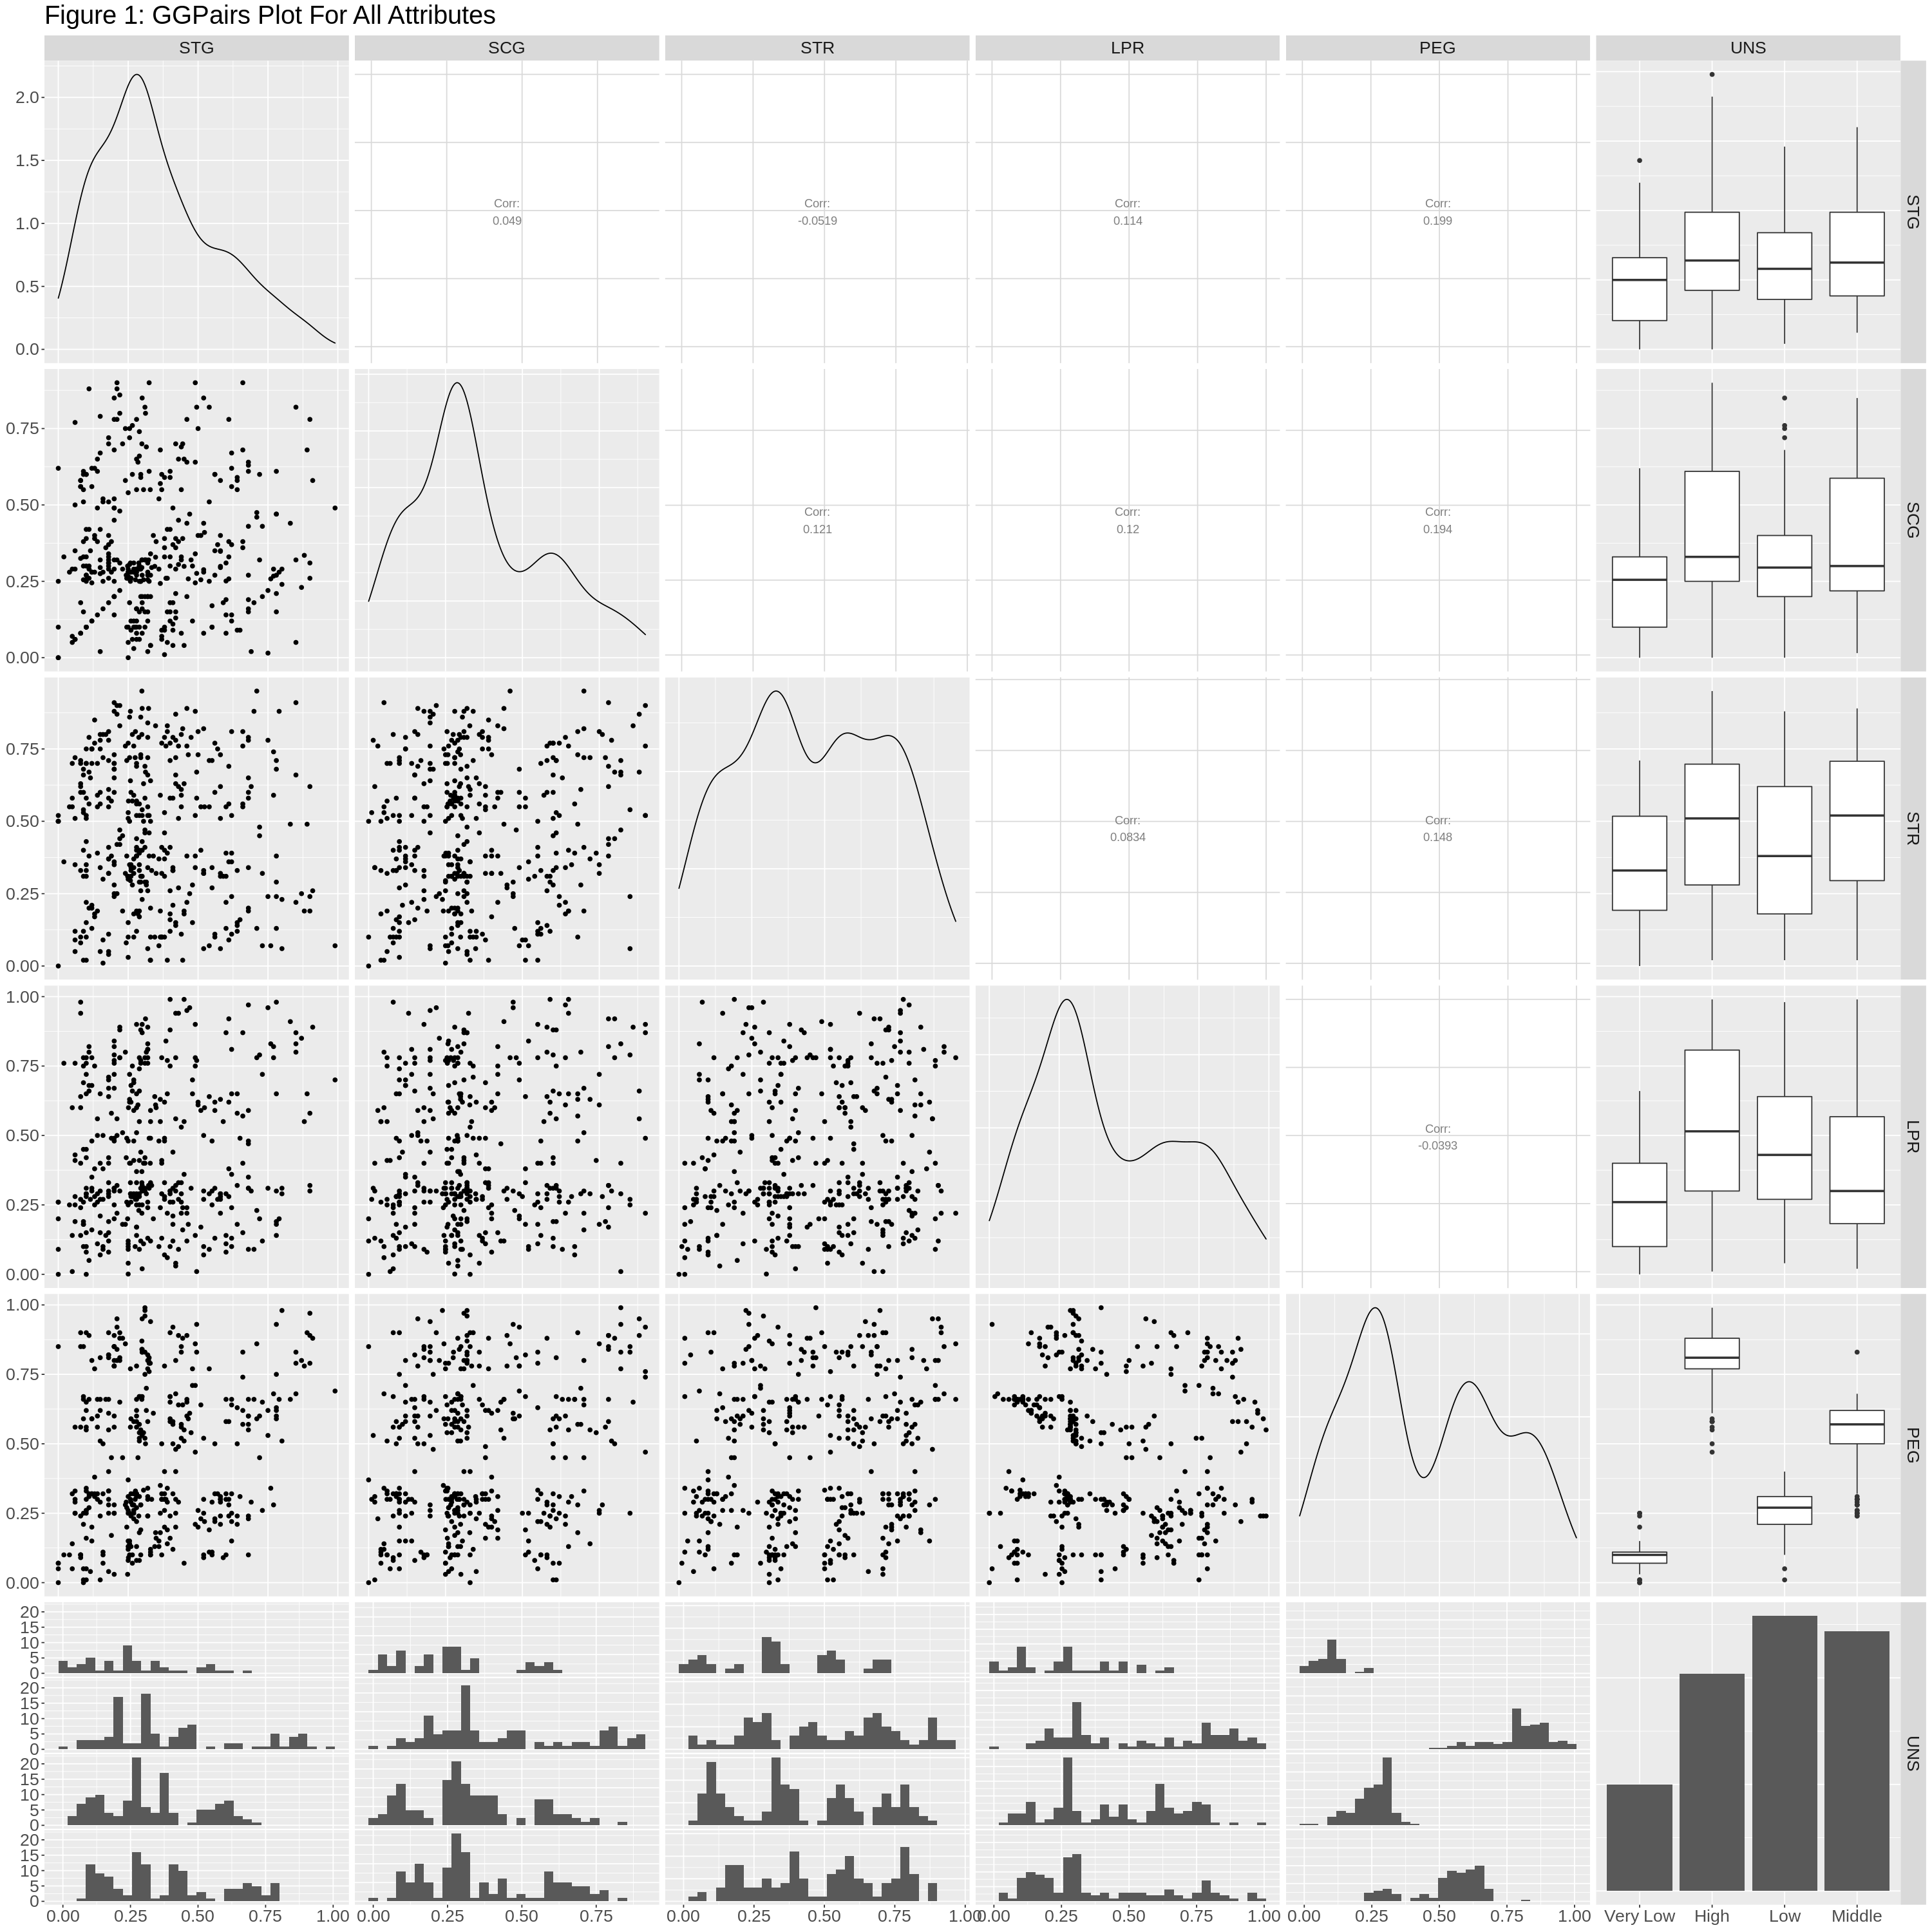

In [6]:
options(repr.plot.width = 25, repr.plot.height = 25) 
knowledge_plot_pairs <- user_knowledge_data_selected %>%
                          ggpairs() + 
                          ggtitle ("Figure 1: GGPairs Plot For All Attributes") +
                          theme(text = element_text(size = 20))
knowledge_plot_pairs

We visualized the training data using a ggpairs plot to identify trends, correlations between attributes, and the spread of data. There is no significant correlation between attributes based on the training data. PEG and STG have a positive correlation with the greatest magnitude (0.199), while STR and STG have a negative correlation with the greatest magnitude (-0.0519). This is supported by the spread of data in the scatterplots and so each attribute may be considered to be independent with respect to the other attributes. 

**<li> Data Analysis </li>**

Utilizing the box plot medians and distributions, we will attempt to visually identify the attributes that would be useful as predictors due to distinctness in one or more knowledge categories. We will then attempt to refine our selection by looking at the distributions more in depth to identify areas of overlap and exclusivity by using density plots. Next, we will run K-NN classification models using the selected predictors to evaluate their accuracy in classifying. Finally, we will visualize the correlation between the predictors using a ggpairs plot. 

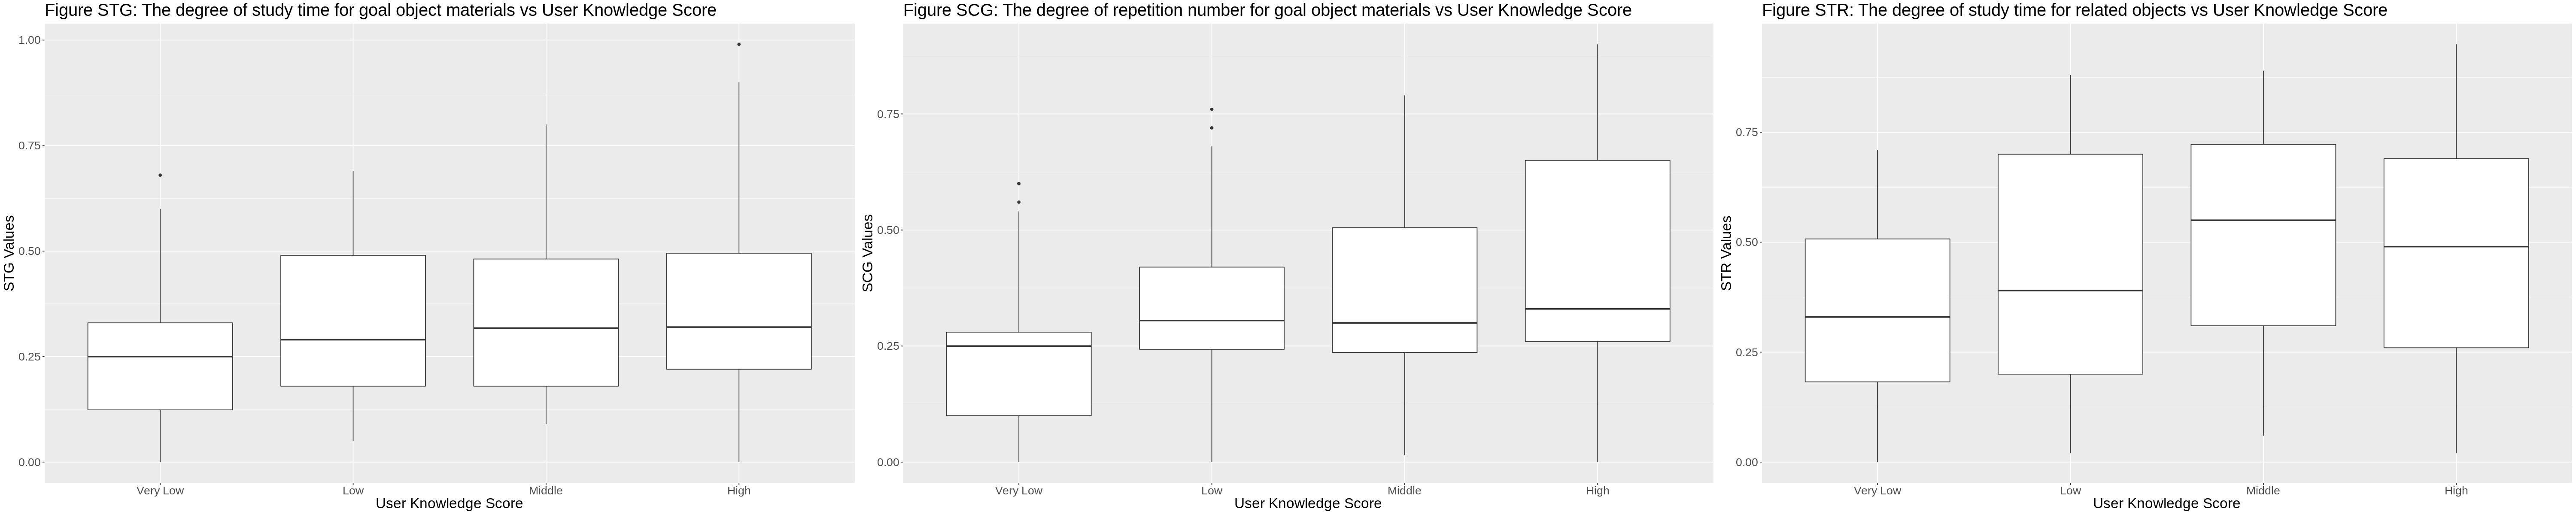

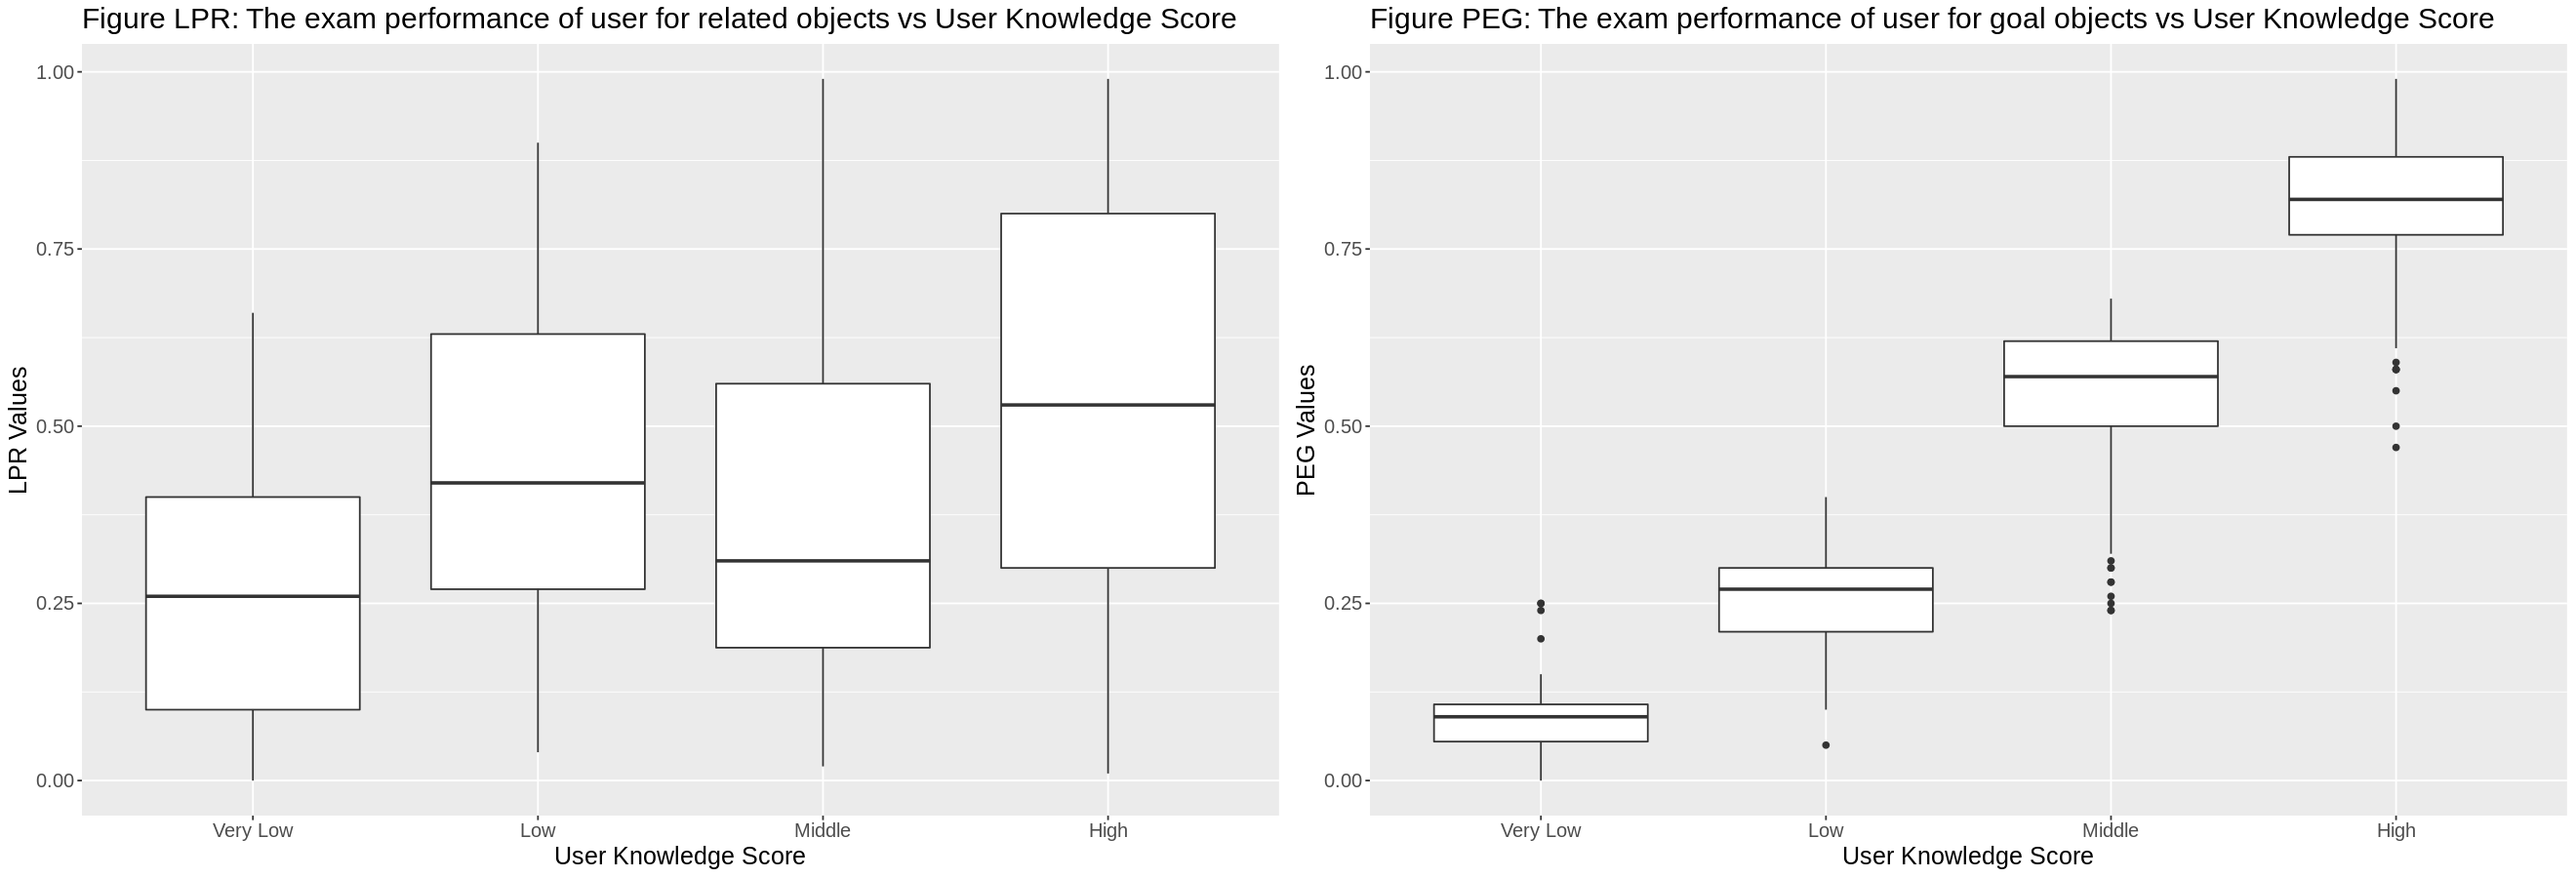

In [7]:
user_knowledge_data_STG <- knowledge_data_training %>%
select(STG, UNS)


user_knowledge_data_SCG <- knowledge_data_training %>%
select(SCG, UNS)


user_knowledge_data_STR <- knowledge_data_training %>%
select(STR, UNS)


user_knowledge_data_LPR <- knowledge_data_training %>%
select(LPR, UNS)


user_knowledge_data_PEG <- knowledge_data_training %>%
select(PEG, UNS)

options(repr.plot.height = 7, repr.plot.width = 15)

user_knowledge_data_STG$UNS <- factor(user_knowledge_data_STG$UNS, levels = c("Very Low", "Low", "Middle", "High"))
STG_box_plot <- ggplot(user_knowledge_data_STG, aes(x = UNS, y = STG)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "STG Values", 
                               title= "Figure STG: The degree of study time for goal object materials vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))

user_knowledge_data_SCG$UNS <- factor(user_knowledge_data_SCG$UNS, levels = c("Very Low", "Low", "Middle", "High"))
SCG_box_plot <- ggplot(user_knowledge_data_SCG, aes(x = UNS, y = SCG)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "SCG Values", 
                               title= "Figure SCG: The degree of repetition number for goal object materials vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))

user_knowledge_data_STR$UNS <- factor(user_knowledge_data_STR$UNS, levels = c("Very Low", "Low", "Middle", "High"))
STR_box_plot <- ggplot(user_knowledge_data_STR, aes(x = UNS, y = STR)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "STR Values", 
                               title= "Figure STR: The degree of study time for related objects vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))

user_knowledge_data_LPR$UNS <- factor(user_knowledge_data_LPR$UNS, levels = c("Very Low", "Low", "Middle", "High"))
LPR_box_plot <- ggplot(user_knowledge_data_LPR, aes(x = UNS, y = LPR)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "LPR Values", 
                               title= "Figure LPR: The exam performance of user for related objects vs User Knowledge Score") + 
                          theme(text = element_text(size = 15))

user_knowledge_data_PEG$UNS <- factor(user_knowledge_data_PEG$UNS, levels = c("Very Low", "Low", "Middle", "High"))
PEG_box_plot <- ggplot(user_knowledge_data_PEG, aes(x = UNS, y = PEG)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "PEG Values", 
                               title= "Figure PEG: The exam performance of user for goal objects vs User Knowledge Score") + 
                          theme(text = element_text(size = 15))

options(repr.plot.height = 10, repr.plot.width = 50)
grid.arrange(STG_box_plot, SCG_box_plot, STR_box_plot, ncol=3)
options(repr.plot.height = 7.5, repr.plot.width = 22)
grid.arrange(LPR_box_plot, PEG_box_plot, ncol=2)


**From the above boxplots, we can see the following trends in each of the potential predictors:**
- STG: The medians for all 4 user knowledge categories are very similar, the distributions have significant overlap. This makes it difficult to distinguish between categories and thus would make not be a good predictor in our model. 
- SCG: Although the medians are very similar, the distributions have more variance and appear to have less overlap. There also seems to be monotonic increase from "Very Low" to "High" user knowledge scores, thus at this stage we may consider using this predictor in our model.  
- STR: Although the medians appear to have some variance, the distributions have significant overlap across all four UNS categories, thus rendering it unsuitable for use in classification.
- LPR: The median appears to "zig-zag" as it increases across the UNS categories, this is also reflected in the distributions. Thus we are able to distinguish certain categories such as "Very Low" to "Low" and "Medium" to "High". Thus rendering this as a good predictor for our model. 
- PEG: There is obvious and significant differentiation between the four categories, both in terms of the median and overall distribution. This makes for a very good predictor in our model. 

Picking joint bandwidth of 0.0719

Picking joint bandwidth of 0.0677

Picking joint bandwidth of 0.092

Picking joint bandwidth of 0.0906

Picking joint bandwidth of 0.0262



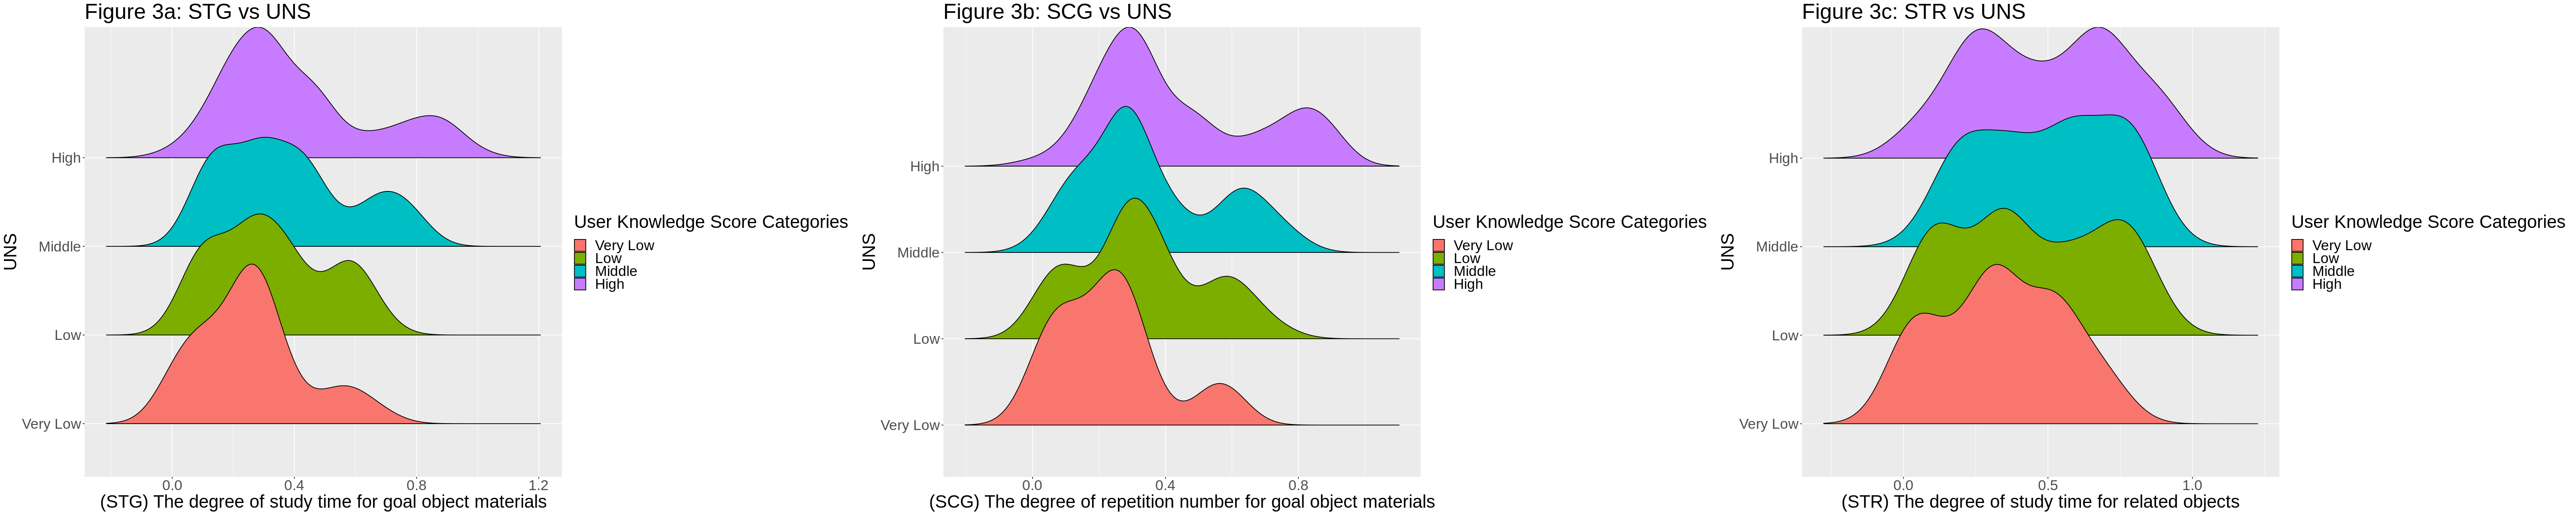

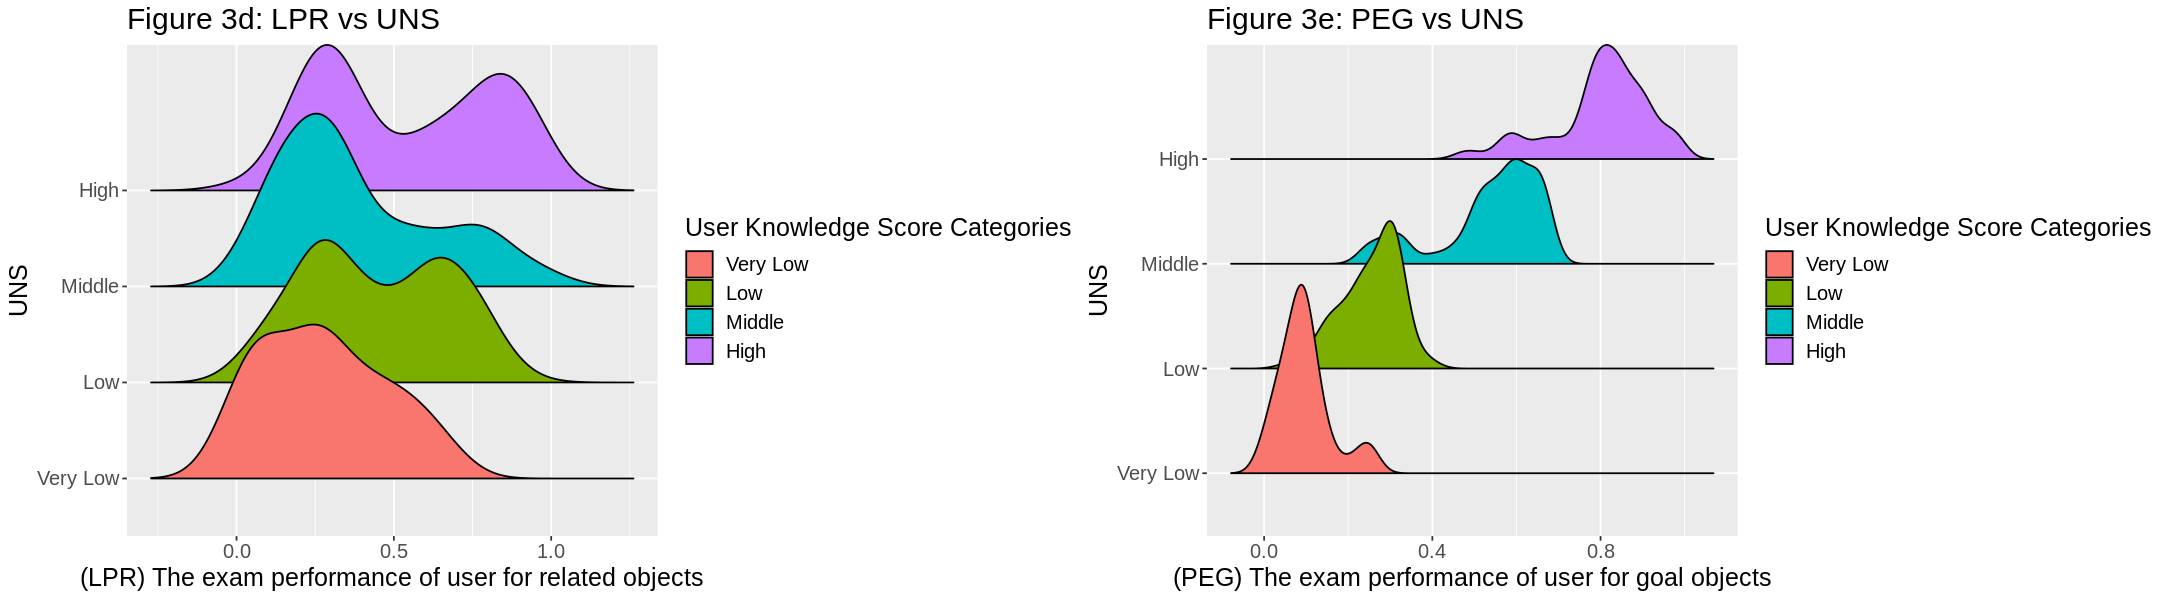

In [8]:
options(repr.plot.height = 5, repr.plot.width = 15)

STG_density_plot <- ggplot(user_knowledge_data_STG, aes(x = STG, y = UNS, fill = UNS)) + 
    geom_density_ridges2() +
    labs(x= "(STG) The degree of study time for goal object materials", title = "Figure 3a: STG vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 25))

SCG_density_plot <- ggplot(user_knowledge_data_SCG, aes(x = SCG, y = UNS, fill = UNS)) + 
    geom_density_ridges2() +
    labs(x= "(SCG) The degree of repetition number for goal object materials", title = "Figure 3b: SCG vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 25))

STR_density_plot <- ggplot(user_knowledge_data_STR, aes(x = STR, y = UNS, fill = UNS)) + 
    geom_density_ridges2() +
    labs(x= "(STR) The degree of study time for related objects", title = "Figure 3c: STR vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 25))

LPR_density_plot <- ggplot(user_knowledge_data_LPR, aes(x = LPR, y = UNS, fill = UNS)) + 
    geom_density_ridges2() +
    labs(x= "(LPR) The exam performance of user for related objects", title = "Figure 3d: LPR vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 15))

PEG_density_plot <- ggplot(user_knowledge_data_PEG, aes(x = PEG, y = UNS, fill = UNS)) +
    geom_density_ridges2() +
    labs(x= "(PEG) The exam performance of user for goal objects", title = "Figure 3e: PEG vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 15))

options(repr.plot.height = 10, repr.plot.width = 50)
grid.arrange(STG_density_plot, SCG_density_plot, STR_density_plot, ncol=3)
options(repr.plot.height = 5, repr.plot.width = 18)
grid.arrange(LPR_density_plot, PEG_density_plot, ncol=2)

**From the above density plots, we can see the following trends in each of the potential predictors:**
- STG: We can see a rough bimodal distribution for all four UNS categories that overlap significantly, thus our initial assessment based on the boxplots of this not being a good predictor is confirmed. 
- SCG: Contrary to our assessment from the boxplots, we can see in the density plots that this variable no longer appears to be a good predictor as it very closely resembles a similar distribution as our STG variable, thus we will not include it in our model.  
- STR: Confirming our initial assessment, all four knowledge score distributions can be seen to have significant overlap in a unimodal fashion. Thus, we can exclude this predictor completely from our model.
- LPR: There appears to be irregularity in the distributions such that we are able to distinguish between certain categories such as "Very Low" to "Low" and "Medium" to "High" based on the varying probability densities under certain values. Thus confirming our initial assessment and can include this variable in our predictive model. 
- PEG: From the density plots, we can see slight overlap in the distributions; however, there is still significant delineation between the four categories. This confirming our initial assessment with the boxplots and making for a very good predictor in our model. 

From the plots, we are able to select 2 predictors, PEG and LPR. However, PEG has a significant difference in the distribution for each knowledge category and we would like to confirm that it is not single-handedly responsible for the final observed classification accuracy. Thus, we will formulate and run 2 classification models: one utilizing only PEG, the other utilizing both PEG and LPR to evaluate the respective contributions of each predictor to the observed accuracies. 

The box plots were useful in identifying medians and 50% of the data around the medians and so were used to initially identify attributes of interest for use as predictors. 
The density plots were more in-depth and visualized the distribution for each knowledge category for all attributes. This allowed for detailed, methodical assessment of overlap to finalize our selection of attributes from the boxplots.

The iterative selection process illustrated the advantages and drawbacks of each visualization methods, with box plots being good for quick assessment, but insufficient for in-depth analysis, while the density plots required careful study to interpret, but yielding a more in-depth analysis. 

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.7977616,5,0.03879084,Model01
3,accuracy,multiclass,0.8218079,5,0.02848636,Model02
4,accuracy,multiclass,0.8179311,5,0.03683618,Model03
6,accuracy,multiclass,0.8348345,5,0.01939198,Model04
8,accuracy,multiclass,0.8546301,5,0.01895596,Model05
9,accuracy,multiclass,0.8609793,5,0.02080417,Model06


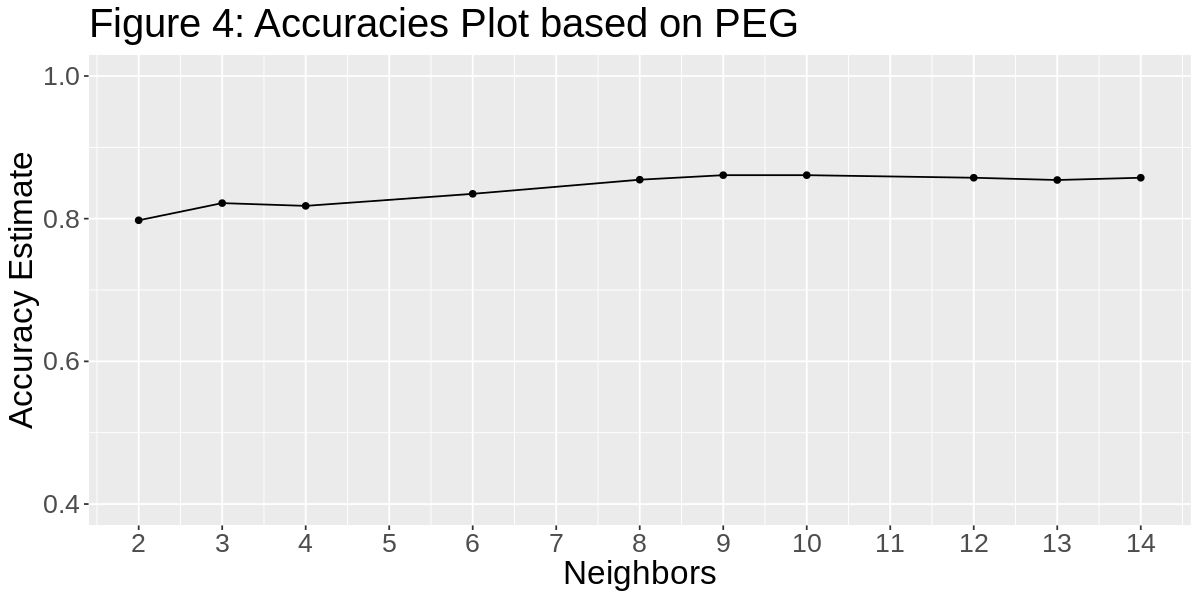

In [9]:
set.seed(2000)

peg_knowledge_recipe <- recipe(UNS ~ PEG, data = knowledge_data_training) %>%
       step_center (all_predictors()) %>%
       step_scale (all_predictors()) 
                        
peg_knowledge_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

peg_knowledge_vfold <- vfold_cv(knowledge_data_training, v = 5, strata = UNS)

peg_knowledge_results <- workflow() %>%
       add_recipe(peg_knowledge_recipe) %>%
       add_model(peg_knowledge_tune) %>%
       tune_grid(resamples = peg_knowledge_vfold, grid = 10) %>%
       collect_metrics()

options(repr.plot.height = 5, repr.plot.width = 10)

peg_accuracies <- peg_knowledge_results %>% 
       filter(.metric == "accuracy")
head(peg_accuracies)

peg_accuracies_plot <- ggplot(peg_accuracies, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure 4: Accuracies Plot based on PEG ") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  
       scale_y_continuous(limits = c(0.4, 1.0)) + 
       theme(text = element_text(size = 20)) 

peg_accuracies_plot

From this accuracy plot, only using one variable (PEG), we can see that the optimized k (neighbor) = 3 at roughly 82.2% accuracy. Although it appears that k=9 gives the high accuracy estimate, we did not choose k=9 to avoid overfitting. 

In [10]:
set.seed(2000)

peg_knowledge_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
       set_engine("kknn") %>%
       set_mode("classification")

peg_knowledge_fit <- workflow() %>%
       add_recipe(peg_knowledge_recipe) %>%
       add_model(peg_knowledge_spec) %>%
       fit(data = knowledge_data_testing)
peg_knowledge_fit
                                   
peg_knowledge_predictions <- predict(peg_knowledge_fit, knowledge_data_testing) %>%
       bind_cols(knowledge_data_testing)
head(peg_knowledge_predictions)

peg_knowledge_metrics <- peg_knowledge_predictions %>%
       metrics(truth = UNS, estimate = .pred_class)
peg_knowledge_metrics

peg_knowledge_conf_mat <- peg_knowledge_predictions %>%
       conf_mat(truth = UNS, estimate = .pred_class)
peg_knowledge_conf_mat
                         

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_center()
● step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~3, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2020202
Best kernel: rectangular
Best k: 3

.pred_class,STG,SCG,STR,LPR,PEG,UNS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
High,0.08,0.08,0.10,0.24,0.90,High
Low,0.10,0.10,0.15,0.65,0.30,Middle
Low,0.08,0.08,0.08,0.98,0.24,Low
Middle,0.10,0.10,0.43,0.29,0.56,Middle
High,0.12,0.12,0.75,0.35,0.80,High
Middle,0.18,0.30,0.37,0.12,0.66,Middle


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8383838
kap,multiclass,0.7788327


          Truth
Prediction Very Low High Low Middle
  Very Low       12    0   4      0
  High            0   22   0      1
  Low             0    0  28      8
  Middle          0    3   0     21

From fiting our model with using k (neighbors) = 3 and only using PEG as our predictor, our predictions (classifier) garner a 83.8% accuracy.

The confusion matrix indicates relatively few mismatches and any that do occur are not extreme, e.g. misclassifications from Middle to Low occur, but not from Middle to Very Low or from Very High to Low or vice versa.

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.9503982,5,0.00949899,Model01
3,accuracy,multiclass,0.9565886,5,0.01388625,Model02
4,accuracy,multiclass,0.9565886,5,0.01388625,Model03
6,accuracy,multiclass,0.9665429,5,0.01190393,Model04
8,accuracy,multiclass,0.9665429,5,0.01190393,Model05
9,accuracy,multiclass,0.9600350,5,0.01360294,Model06


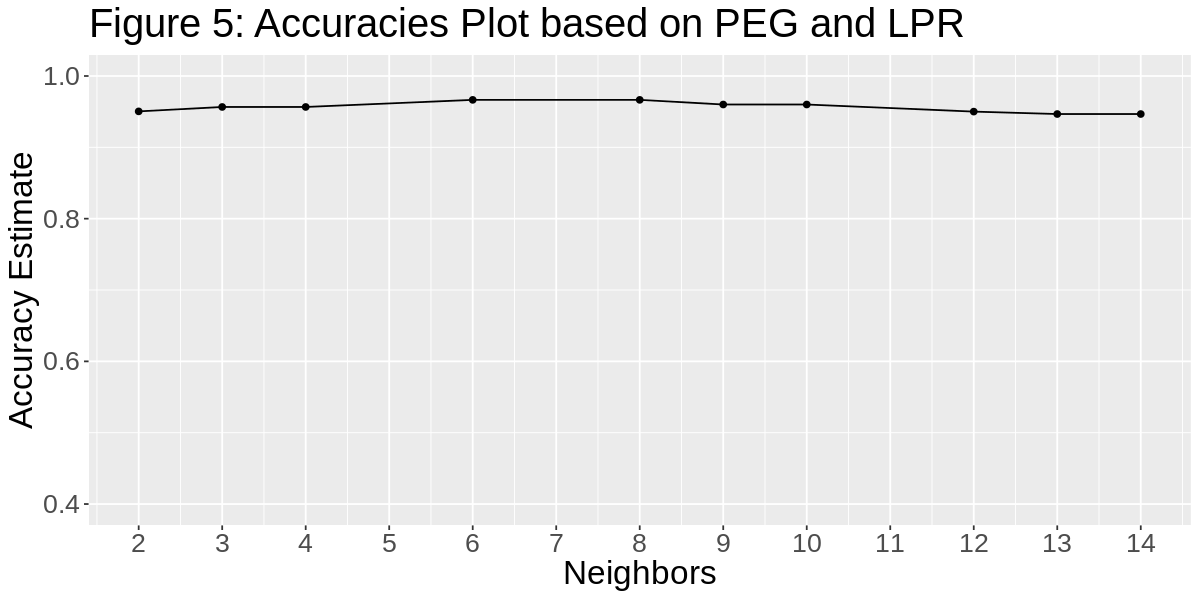

In [11]:
set.seed(2000)

knowledge_recipe <- recipe(UNS ~ PEG + LPR, data = knowledge_data_training) %>%
       step_center (all_predictors()) %>%
       step_scale (all_predictors()) 


knowledge_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

knowledge_vfold <- vfold_cv(knowledge_data_training, v = 5, strata = UNS)

knowledge_results <- workflow() %>%
       add_recipe(knowledge_recipe) %>%
       add_model(knowledge_tune) %>%
       tune_grid(resamples = knowledge_vfold, grid = 10) %>%
       collect_metrics()

options(repr.plot.height = 5, repr.plot.width = 10)

accuracies <- knowledge_results %>% 
       filter(.metric == "accuracy")

head(accuracies)

accuracies_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure 5: Accuracies Plot based on PEG and LPR") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  
       scale_y_continuous(limits = c(0.4, 1.0)) + 
       theme(text = element_text(size = 20)) 
 

accuracies_plot

From this accuracy plot, using two predictors (PEG and LPR) we can see that the optimized k (neighbors) = 3 at roughly 95.7% accuracy. We could pick any k value between 2-14 as it gives roughly similar accuracies, but we decided to choose an odd number to avoid an even split between the neighboring labels and a small number to avoid overfitting. 

In [12]:
set.seed(2000)

knowledge_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
       set_engine("kknn") %>%
       set_mode("classification")

knowledge_fit <- workflow() %>%
       add_recipe(knowledge_recipe) %>%
       add_model(knowledge_spec) %>%
       fit(data = knowledge_data_testing)
knowledge_fit
                                   
knowledge_predictions <- predict(knowledge_fit, knowledge_data_testing) %>%
       bind_cols(knowledge_data_testing)
head(knowledge_predictions)

knowledge_metrics <- knowledge_predictions %>%
       metrics(truth = UNS, estimate = .pred_class)
knowledge_metrics

knowledge_conf_mat <- knowledge_predictions %>%
       conf_mat(truth = UNS, estimate = .pred_class)
knowledge_conf_mat
                                   
                                   

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_center()
● step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~3, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.06060606
Best kernel: rectangular
Best k: 3

.pred_class,STG,SCG,STR,LPR,PEG,UNS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
High,0.08,0.08,0.10,0.24,0.90,High
Middle,0.10,0.10,0.15,0.65,0.30,Middle
Middle,0.08,0.08,0.08,0.98,0.24,Low
Middle,0.10,0.10,0.43,0.29,0.56,Middle
High,0.12,0.12,0.75,0.35,0.80,High
Middle,0.18,0.30,0.37,0.12,0.66,Middle


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9595960
kap,multiclass,0.9443429


          Truth
Prediction Very Low High Low Middle
  Very Low       12    0   0      0
  High            0   25   0      1
  Low             0    0  30      1
  Middle          0    0   2     28

From fiting our model with using k (neighbors) = 3 and only using both PEG and LPR as our predictors, our predictions (classifier) garner a 95.9% accuracy.

As in the previous model, the confusion matrix indicates relatively few mismatches and any that do occur are not extreme, e.g. misclassifications from Middle to Low occur, but not from Middle to Very Low or from Very High to Low or vice versa. The number of misclassifications is also reduced across the board.

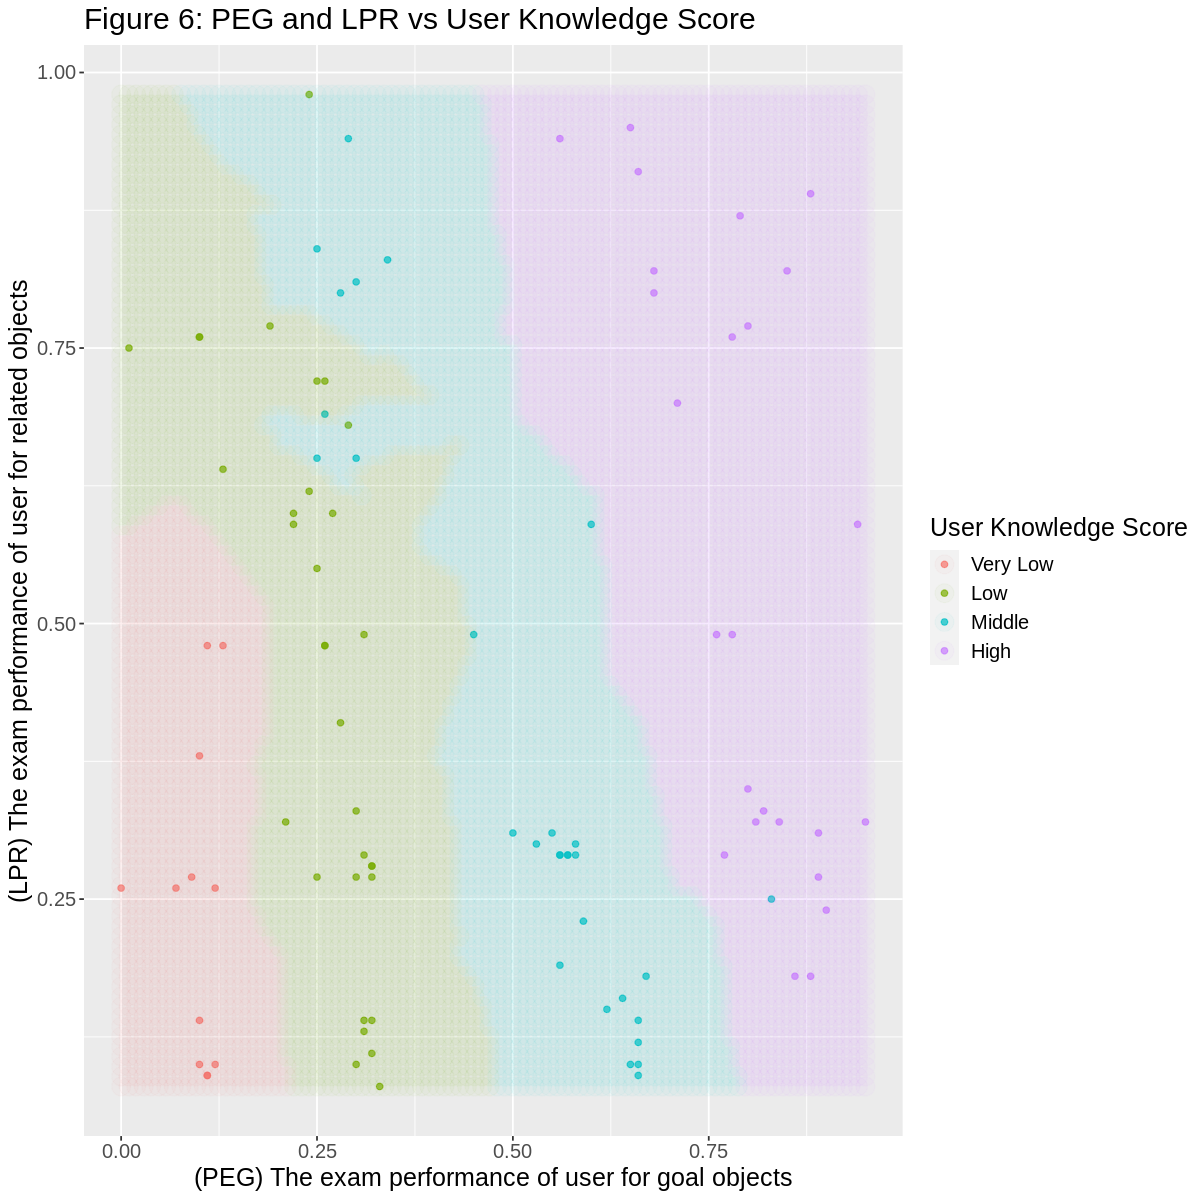

In [13]:
options(repr.plot.height = 10, repr.plot.width = 10)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
    set_engine("kknn") %>%
    set_mode("classification")
  
knn_fit <- workflow() %>%
    add_recipe(knowledge_recipe) %>%
    add_model(knn_spec) %>%
    fit(data = knowledge_data_testing)

peg_grid <- seq(min(knowledge_data_testing$PEG), max(knowledge_data_testing$PEG), length.out = 100)
lpr_grid <- seq(min(knowledge_data_testing$LPR), max(knowledge_data_testing$LPR), length.out = 100)
scgrid <- as_tibble(expand.grid(PEG = peg_grid, LPR = lpr_grid))
knnPredGrid <- predict(knn_fit, scgrid)
prediction_table <- bind_cols(knnPredGrid, scgrid) %>% rename(UNS = .pred_class)

knowledge_predictions$UNS <- factor(knowledge_predictions$UNS, levels = c("Very Low", "Low", "Middle", "High"))

knowledge_prediction_plot <- ggplot() +
    geom_point(data = knowledge_predictions, mapping = aes(x = PEG, y = LPR, color = UNS), alpha= 0.7) +
    geom_point(data = prediction_table, mapping = aes(x = PEG, y = LPR, color = UNS), alpha = 0.03, size = 5.) +
    labs(x = "(PEG) The exam performance of user for goal objects", y = "(LPR) The exam performance of user for related objects", color = "User Knowledge Score") +
    ggtitle("Figure 6: PEG and LPR vs User Knowledge Score") + 
    theme(text = element_text(size = 15))

knowledge_prediction_plot


The above plot identifies the solution spaces for the classification by utilizing LPR and PEG as predictors. 

From fiting our model with k (neighbors) = 3 and using PEG and LPR instead of just PEG as our predictor, our classifier increased from a 83.8% to a 95.9% accuracy

When using only PEG as our predictor, we saw a k value of 3 to be optimal from the accuracy plot and obtained a prediction accuracy of 83.8%. This agrees with our initial assessment of PEG being an excellent predictor due to the clear delineation between UNS categories. 

When adding LPR as a predictor in addition to PEG, we saw many similar k values ranging from 3 to 14, but came to the conclusion that again 3 offered the highest accuracy. From this we obtained a prediction accuracy of 95.9%, an increase of over 12% from our original model which only used PEG. Thus, LPR was able to better allow our model to differentiate between categories. 

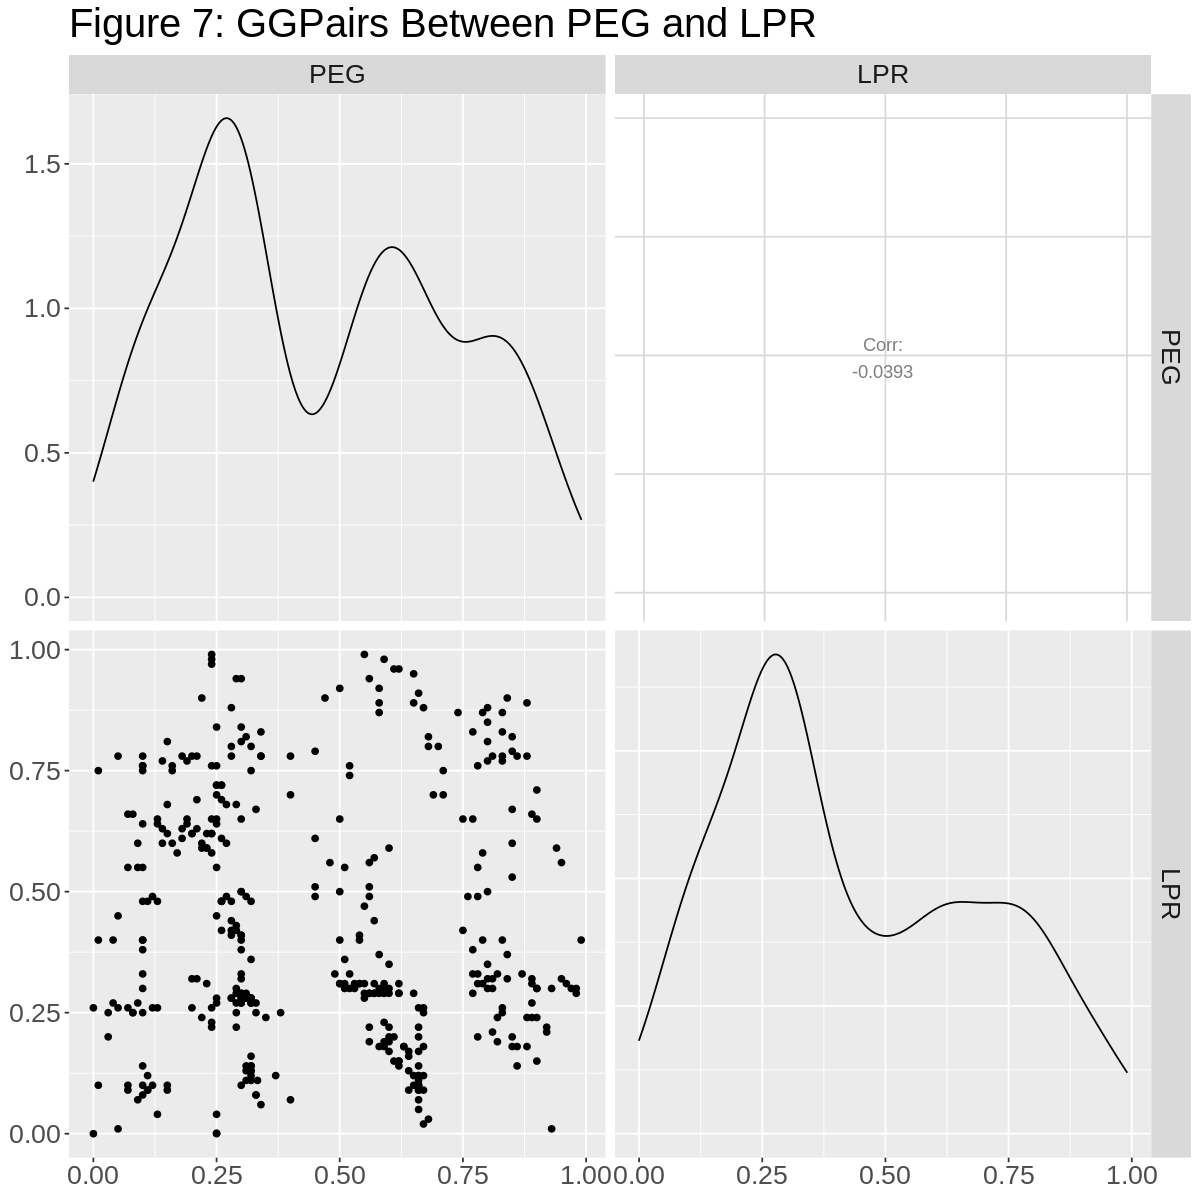

In [14]:
predictor_plot_pairs <- user_knowledge_data_selected %>%
  select(PEG, LPR) %>%
  ggpairs() +
  ggtitle ("Figure 7: GGPairs Between PEG and LPR") +
  theme(text = element_text(size = 20))
predictor_plot_pairs

We visualized the entire data set using a ggpairs plot to identify the correlation between PEG and LPR, as well as the spread of data. A correlation of -0.0393 is observed, indicating a very weak relationship between the two attributes. This is supported by the spread in the scatterplot which does not have any easily discernible trend. Therefore, we can conclude that the attributes act independently of each other. 

<h3>Discussion:</h3>

**<li> Summary of results </li>**
    
Results indicated PEG and LPR to be excellent predictors of UNS in a K-NN classification model with an accuracy of almost 96%. PEG was seen to be primarily responsible for this high classification accuracy, singularly giving a result of almost 84% in a K-NN model. LPR was thus found to be not as strong a predictor, but nonetheless increased accuracy by around 12%  from an already high accuracy, thus proving to be of significance. In "real world" terms, performance on examinations directly related to the subject matter was an excellent predictor of student knowledge level while exam performance of subjects related to the main subject matter was shown to have a definite impact as well.
    
**<li> Discussion of Expectations </li>**
    
We did expect student performance on subject matter related examinations (PEG) to be a good predictor of knowledge level as the examinations are directly designed to be assessments of student knowledge and student performance on the examinations is used to formally evaluate and classify student knowledge and learning outcomes. The effect of student performance on related items was interesting to see as we were not sure if knowledge and learning success would necessarily transfer between subjects. 
    
We expected STG, SCG, and STR to have good predictive values for UNS as they quantify studying efforts on part of students, and we expected higher values of such to predict higher exam scores, and thus higher knowledge levels. This was not seen in the predictive analysis. We also expected these 3 attributes to be correlated to at least some extent with PEG and LPR as the latter two quantify exam success. However, this was not seen in our ggpairs plot using the training data. 
    
**<li> Impact of Findings </li>**  
    
The findings reinforce the expectation that student success on subject matter examinations can be used to identify student knowledge and this can be used to gather demographics for targeted interventions aimed at helping struggling students succeed, through analysis of exam scores. Exam performance on related items also seems to play a factor thus learning success may transfer at least partially between subjects and this can be used to formulate unique learning strategies on a case-to-case basis drawing on students' experiences in other topics and identify knowledge assimilation strategies used by students with higher knowledge levels. The lack of strong predictive value of the other attributes can be used to inform an emphasis on certain aspects of the learning process and evaluate specific related processes and programs in the knowledge transfer process where resources are targeted but predictive value is not found.
    
**<li> Future Questions </li>**
    
- A similar analysis could be conducted, excluding PEG and LPR, to identify which of the other attributes are comparatively better at predicting UNS.
- Are these results consistent over similar domains of knowledge and technical fields?
- What are the patterns in how different combinations of attributes affect knowledge level?    
- Which attributes out of STG, SCG, and SCR (study time attributes) best predict PEG and LPR (exam performance attributes)? 


<br><br>
<h4>References: </h4>

H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.

Zeina Bitar, Abbas Sandouk, Samih Al Jabi,
Testing the Performances of DC Series Motor Used in Electric Car,
Energy Procedia,
Volume 74,
2015,
Pages 148-159,
ISSN 1876-6102,
https://doi.org/10.1016/j.egypro.2015.07.536.
(https://www.sciencedirect.com/science/article/pii/S1876610215013041)

Barbarick, K.A. and Ippolito, J.A. (2003), Does the Number of Hours Studied Affect Exam Performance?. Journal of Natural Resources and Life Sciences Education, 32: 32-35. https://doi.org/10.2134/jnrlse.2003.0032

